In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier

In [3]:
train_data = pd.read_csv('bank_train.csv')
test_data = pd.read_csv('bank_test.csv')

In [8]:
print(train_data.info())
print("\n")
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4466 entries, 0 to 4465
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4466 non-null   int64  
 1   job        4466 non-null   object 
 2   marital    4466 non-null   object 
 3   education  4466 non-null   object 
 4   default    4466 non-null   object 
 5   balance    4465 non-null   float64
 6   housing    4466 non-null   object 
 7   loan       4466 non-null   object 
 8   contact    4466 non-null   object 
 9   day        4466 non-null   int64  
 10  month      4466 non-null   object 
 11  duration   4466 non-null   int64  
 12  campaign   4466 non-null   int64  
 13  pdays      4466 non-null   int64  
 14  previous   4466 non-null   int64  
 15  poutcome   4465 non-null   object 
 16  deposit    4466 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 593.3+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117 entrie

In [7]:
print(train_data.isna().sum())
print("\n")
print(test_data.isna().sum())

age          0
job          0
marital      0
education    0
default      0
balance      1
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     1
deposit      0
dtype: int64


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     1
poutcome     0
deposit      0
dtype: int64


In [9]:
print(train_data.describe())
print("\n")
print(test_data.describe())

               age       balance          day     duration     campaign  \
count  4466.000000   4465.000000  4466.000000  4466.000000  4466.000000   
mean     41.100090   1484.334378    15.740484   371.089342     2.484774   
std      11.905566   3253.910473     8.448066   346.904391     2.633638   
min      18.000000  -3058.000000     1.000000     3.000000     1.000000   
25%      32.000000    107.000000     8.000000   137.000000     1.000000   
50%      38.000000    539.000000    16.000000   256.000000     2.000000   
75%      49.000000   1728.000000    22.000000   485.000000     3.000000   
max      93.000000  81204.000000    31.000000  3284.000000    43.000000   

             pdays     previous  
count  4466.000000  4466.000000  
mean     52.880878     0.866995  
std     111.146726     2.381197  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      64.750000     1.000000  
max     828.000000    41.000000  


               a

## Answer questions from 1 to 8 based on the train_data dataframe

## Q1 What is the correlation between the age of the clients and their average yearly bank balance? (approx.)
#### 0.1290
 
 0.1375
 
 0.0092
 
-0.0183

In [10]:
print(train_data.corr())

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.129043 -0.007330 -0.007839 -0.018284  0.002402  0.029582
balance   0.129043  1.000000  0.009142  0.015043 -0.031025  0.038155  0.044608
day      -0.007330  0.009142  1.000000 -0.013382  0.140019 -0.080303 -0.055446
duration -0.007839  0.015043 -0.013382  1.000000 -0.040431 -0.040912 -0.032467
campaign -0.018284 -0.031025  0.140019 -0.040431  1.000000 -0.104013 -0.040107
pdays     0.002402  0.038155 -0.080303 -0.040912 -0.104013  1.000000  0.486493
previous  0.029582  0.044608 -0.055446 -0.032467 -0.040107  0.486493  1.000000


## Q2 How many numerical columns are present in the dataframe?
 4
 
#### 7
 
 6
 
 10

## Q 3 How many rows of data contain missing values?
#### 2
 
 7
 
 6
 
 3

In [15]:
train_data.isna().any(axis=0).sum()

2

## Q4 What is the shape of the dataframe after dropping the rows containing NA values?
 (4465, 17)
 
 (4450, 17)
 
#### (4464, 17)
 
 (4400, 17)

In [27]:
train_data = pd.read_csv('bank_train.csv')

In [30]:
train_data = train_data.dropna(axis = 0)

In [31]:
train_data.shape

(4464, 17)

## Q5 What % of clients with primary education have subscribed to a deposit? (approx.)
 42.28
 
 43.58
 
 39.78
 
#### 40.70

In [2]:
train_data = pd.read_csv('bank_train.csv')


In [4]:
pd.crosstab(index = train_data["education"], 
            columns = train_data["deposit"],
            normalize = "index", 
            margins = False)

## Before dropping NA rows.... 40.70%


deposit,no,yes
education,,
primary,0.592965,0.407035
secondary,0.565578,0.434422
tertiary,0.449535,0.550465
unknown,0.494737,0.505263


In [48]:
train_data = pd.read_csv('bank_train.csv')
train_data = train_data.dropna(axis = 0)

In [49]:
pd.crosstab(index = train_data["education"], 
            columns = train_data["deposit"],
            normalize = "index", 
            margins = False)

## After dropping NA rows.... 40.70%

deposit,no,yes
education,,
primary,0.592965,0.407035
secondary,0.565177,0.434823
tertiary,0.449535,0.550465
unknown,0.494737,0.505263


## Q6 What are the average number of contacts performed during this campaign for clients who have not subscribed to a deposit? (approx.)
#### 2.778
 
 2.345
 
 2.673
 
 2.937

In [52]:
train_data = pd.read_csv('bank_train.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4466 entries, 0 to 4465
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4466 non-null   int64  
 1   job        4466 non-null   object 
 2   marital    4466 non-null   object 
 3   education  4466 non-null   object 
 4   default    4466 non-null   object 
 5   balance    4465 non-null   float64
 6   housing    4466 non-null   object 
 7   loan       4466 non-null   object 
 8   contact    4466 non-null   object 
 9   day        4466 non-null   int64  
 10  month      4466 non-null   object 
 11  duration   4466 non-null   int64  
 12  campaign   4466 non-null   int64  
 13  pdays      4466 non-null   int64  
 14  previous   4466 non-null   int64  
 15  poutcome   4465 non-null   object 
 16  deposit    4466 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 593.3+ KB


In [54]:
train_data["deposit"].value_counts()

no     2354
yes    2112
Name: deposit, dtype: int64

In [55]:
not_subscribed = train_data[train_data["deposit"] == "no"].index

In [56]:
print(not_subscribed)

Int64Index([   0,    3,    6,    7,    9,   10,   11,   12,   13,   14,
            ...
            4447, 4450, 4453, 4455, 4456, 4457, 4460, 4461, 4464, 4465],
           dtype='int64', length=2354)


In [57]:
not_subscribed_1 = train_data[train_data["deposit"] == "no"]
print(not_subscribed_1)

      age          job   marital  education default  balance housing loan  \
0      76      retired   married  secondary      no   2302.0      no   no   
3      41  blue-collar   married  secondary      no    356.0     yes   no   
6      59      retired   married  secondary      no    136.0      no   no   
7      34  blue-collar   married    primary      no   5299.0     yes   no   
9      44  blue-collar   married  secondary      no    879.0     yes   no   
...   ...          ...       ...        ...     ...      ...     ...  ...   
4457   43   management   married   tertiary      no   1336.0     yes  yes   
4460   54      retired   married  secondary      no    522.0      no  yes   
4461   33   management   married   tertiary      no    133.0     yes   no   
4464   31   technician    single  secondary      no    628.0     yes   no   
4465   70      retired  divorced    primary      no    383.0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \

In [58]:
not_subscribed_1["campaign"].mean()
## before droppping NA values

2.780798640611725

In [59]:
train_data = pd.read_csv('bank_train.csv')
train_data = train_data.dropna(axis = 0)
not_subscribed_1 = train_data[train_data["deposit"] == "no"]
print(not_subscribed_1["campaign"].mean())
## After dropping NA values

2.7784863945578233


## Q7 How many clients who have subscribed to a deposit either have a housing or a personal loan?
 1198
 
 3605
 
 106
 
#### 893

In [4]:
# METHOD 1
train_data = pd.read_csv('bank_train.csv')
filt = np.logical_and(train_data["deposit"]=="yes",
                     np.logical_or(train_data["housing"]=="yes", train_data["loan"]=="yes"))
deposit_with_hos_personal = train_data[filt==True]
print(len(deposit_with_hos_personal))

893


In [5]:
# METHOD 2
clients_housing_or_loan_having_deposit = train_data[
    ((train_data.housing == 'yes') | (train_data.loan == 'yes')) 
    & (train_data.deposit == 'yes')]

print(len(clients_housing_or_loan_having_deposit))

893


In [20]:
train_data = pd.read_csv('bank_train.csv')
subscribed = train_data[train_data["deposit"] == "yes"]
print(subscribed)

      age          job   marital  education default  balance housing loan  \
1      66      retired  divorced    unknown      no     53.0      no   no   
2      51   management   married   tertiary      no   2455.0     yes   no   
4      51   technician   married  secondary      no  -1944.0     yes   no   
5      77      retired   married    unknown      no   1807.0      no   no   
8      33   management   married   tertiary      no   2599.0      no   no   
...   ...          ...       ...        ...     ...      ...     ...  ...   
4454   30  blue-collar    single  secondary      no    155.0     yes  yes   
4458   32  blue-collar   married    primary      no   -454.0     yes  yes   
4459   37   technician    single  secondary      no   3326.0     yes   no   
4462   39     services  divorced  secondary      no    687.0     yes   no   
4463   40       admin.    single  secondary      no   2040.0     yes   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \

In [24]:
i = 0
#for x in range(len(train_data)):
for x in (subscribed.index):
    if train_data.at[x,"housing"] == "yes" or train_data.at[x,"loan"] == "yes":
    #if train_data.at[x,"deposit"] == "yes":
        i+=1
        
print(i)

## for x in range(len(train_data)):
## this shows key error as the key is dropped under dropna

893


## Using Seaborn’s countplot(), plot a grouped bar plot of marital status and deposit (as hue). Identify the category that has more clients who have subscribed to a deposit than clients who have not deposited.
#### Single
 
 Married
 
 Divorced
 
 None

In [ ]:
train_data = pd.read_csv('bank_train.csv')

<AxesSubplot:xlabel='marital', ylabel='count'>

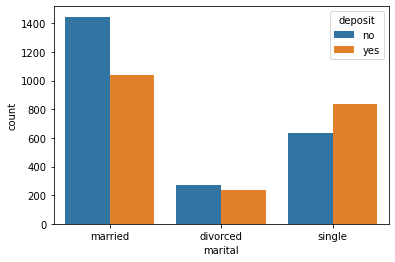

In [67]:
sns.countplot(x = train_data["marital"], hue = train_data["deposit"])

#### Follow the steps given below to answer questions 9 - 13
1. Check for null values in the test_data. If they are present, then remove them
2. Encode categorical variable, deposit - yes as 1 and no as 0
3. Perform dummy encoding on the remaining categorical columns
4. Split the dataframe into independent variables (features) and dependent variable (labels)
5. Build a K Nearest Neighbors model with 11 nearest neighbors over the training set, validate the kNN model over the test set

## Q9 What is the accuracy of the model (Choose the appropriate range)?
 Less than 60 %
 
 #### 71–85%
 
 86–100%
 
 60–70%

In [5]:
train_data = pd.read_csv('bank_train.csv')
test_data = pd.read_csv('bank_test.csv')

In [6]:
train_data = train_data.dropna(axis = 0)
test_data = test_data.dropna(axis = 0)

In [7]:
train_data["deposit"] = train_data["deposit"].map({"yes":1, "no":0})
test_data["deposit"] = test_data["deposit"].map({"yes":1, "no":0})

In [8]:
train_data = pd.get_dummies(data = train_data, drop_first = True)
test_data = pd.get_dummies(data = test_data, drop_first = True)

In [9]:
train_X = train_data.drop(["deposit"],axis = 1, inplace = False)
train_Y = train_data["deposit"]

test_X = test_data.drop(["deposit"],axis = 1, inplace = False)
test_Y = test_data["deposit"]

In [10]:
from sklearn.neighbors import KNeighborsClassifier
KNN_all = KNeighborsClassifier(n_neighbors = 11)

In [11]:
KNN_all.fit(train_X,train_Y)

KNeighborsClassifier(n_neighbors=11)

In [12]:
pred_all = KNN_all.predict(test_X)

In [13]:
acc_all = accuracy_score(test_Y, pred_all)
print(acc_all)

0.771505376344086


## Q10 How many samples were misclassified by the model (Choose the appropriate ran
 140 - 150
 
 151 - 200
 
#### 201 - 300
 
 More than 300

In [14]:
(test_Y != pred_all).sum()

255

In [15]:
confuse = confusion_matrix(test_Y, pred_all)
print(confuse)
## 104 + 151 = 155

[[502 104]
 [151 359]]


[[TN FP]

 [FN TP]]
 
Actual alog horizontal, predicted along vertical

## Q11 What is the sensitivity of the model (Choose the appropriate range)?
 Less than 0.60
 
#### 0.61 – 0.80
 
 0.81 - 0.90
 
 More than 0.90

 #### Sensitivity = TP / (TP + FN)

In [16]:
cm1 = confusion_matrix(test_Y, pred_all)

#sensitivity1 = cm1[0,0]/(cm1[0,0] + cm1[0,1])
#.... by interpretting confusion matrix as [[TP FN]]
#                                          [[FP TN]]... as per wikipedia

sensitivity1 = cm1[1,1]/(cm1[1,0] + cm1[1,1])
#.... by interpretting confusion matrix as [[TN FP]]
#                                          [[FN TP]]... as per sklearn documentation
print(sensitivity1)

0.703921568627451


## Q12 What is the specificity of the model (Choose the appropriate range)?
 Less than 0.60
 
 0.61–0.70
 
#### 0.71–0.90
 
 More than 0.90
 
#### Specificity = TN / (TN + FP)

In [17]:
specificity = cm1[1,1]/(cm1[1,1] + cm1[0,1])

#specificity = cm1[1,1]/(cm1[1,1] + cm1[1,0])
#.... by interpretting confusion matrix as [[TP FN]]
#                                          [[FP TN]]... as per wikipedia

specificity = cm1[0,0]/(cm1[0,0] + cm1[0,1])
#.... by interpretting confusion matrix as [[TN FP]]
#                                          [[FN TP]]... as per sklearn documentation

print(specificity)

0.8283828382838284


## Q13 What is the prevalence of the model (Choose the appropriate range)?
 Less than 0.40
 
#### 0.41–0.50
 
 0.51–0.60
 
 0.61–0.70
 
#### prevalence = (TP + FN) / (Total) = (Total Actual Positive) / (Total population)

In [18]:
knn_prevalence = (cm1[1,1] + cm1[1,0]) / (cm1[1,1] + cm1[1,0] + cm1[0,1] + cm1[0,0]) 
print(knn_prevalence)

0.45698924731182794


#### Follow the steps given below to answer questions 14 & 15
Check for null values in the test_data. If they are present, then remove them

Encode categorical variable, deposit - yes as 1 and no as 0

Perform dummy encoding on the remaining categorical columns

Split the dataframe into independent variables (features) and dependent variable (labels)

Build a logistic regression model (with random_state of the logistic regression instance as 0) over 

the training set and validate the model over the test set

## Q14 What is the accuracy of the logistic regression model (Choose the appropriate range)?
 Less than 60 %
 
 61–75%
 
#### 76–90%
 
 91–100%

In [156]:
lgr = LogisticRegression(random_state = 0)

In [157]:
lgr.fit(train_X, train_Y)

C:\Users\Manoj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [158]:
lgr_pred = lgr.predict(test_X)

In [159]:
lgr_acc = accuracy_score(test_Y, lgr_pred)
print(lgr_acc)

0.8100358422939068


## Q15 How many samples were misclassified by the logistic regression model?
 Less than 150
 
 151–180
 
#### 181–250
 
 251–300

In [160]:
(test_Y != lgr_pred).sum()

212

In [162]:
lgr_confuse = confusion_matrix(test_Y, lgr_pred)
print(lgr_confuse)

[[514  92]
 [120 390]]


[[TN FP]

 [FN TP]]
 
Actual alog horizontal, predicted along vertical

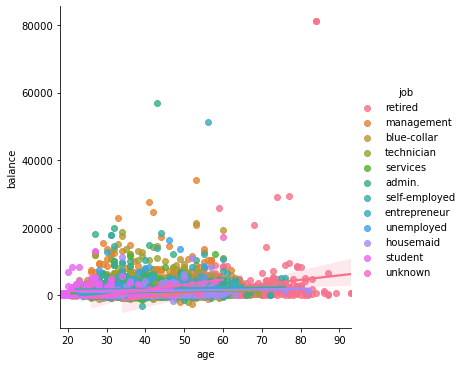

In [8]:
sns.lmplot(data = train_data,
          x = "age", 
          y = 'balance', 
          hue = 'job')